# GPS Data

## Einlesen von GPS Daten mittels [gpxpy](https://github.com/tkrajina/gpxpy)

In [1]:
import gpxpy

with open('RostockerMarathonNacht2015.gpx') as fh:
    gpx_file = gpxpy.parse(fh)

## GPX Segmente nach  Pandas dataframe konvertieren


In [2]:
import pandas as pd
segment = gpx_file.tracks[0].segments[0]
coords = pd.DataFrame([
        {'lat': p.latitude, 
         'lon': p.longitude, 
         'ele': p.elevation,
         'time': p.time} for p in segment.points])
coords.set_index('time', drop=True, inplace=True)
coords.head(3)

,ele,lat,lon
time,,,
2010-01-01 00:00:00,17.0,54.088861,12.140075
2010-01-01 00:00:14,16.0,54.089425,12.139978
2010-01-01 00:00:22,15.0,54.089726,12.139662


## GPS Track mittels matplotlib plotten

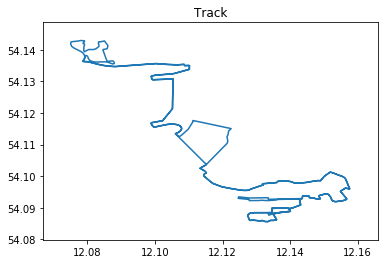

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0.1
plt.rcParams['axes.ymargin'] = 0.1
%matplotlib inline
plt.plot(coords['lon'].values, coords['lat'].values);
plt.title("Track")

## Höhendaten visualisieren

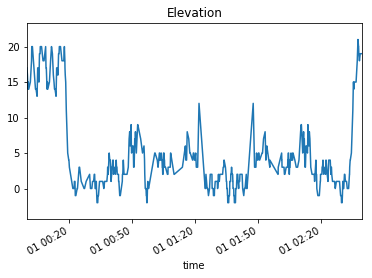

In [4]:
coords.ele.plot(title='Elevation')

## Falls Höhendaten fehlen könne diese mit srtm.py hinzufügt werden
- [srtm.py](https://github.com/tkrajina/srtm.py) ist ein Parser für die Nasa [Shuttle Radar Topography Mission elevation data](http://www2.jpl.nasa.gov/srtm/)
- Erweiterung für gpxpy
- Lizenz: Apache 2.0
- Python 3 kompatibel

In diesem Beispiel müssen die Höhendaten zu Demonstrationszwecken erst einmal entfernt werden. 


In [6]:
for p in gpx_file.tracks[0].segments[0].points:
    p.elevation = None

### Höhendaten via srtm hinzufügen

In [7]:
import srtm
elevation_data = srtm.get_data()
elevation_data.add_elevations(gpx_file, smooth=True)

## Vergleich Höhendaten gpx vs srtm

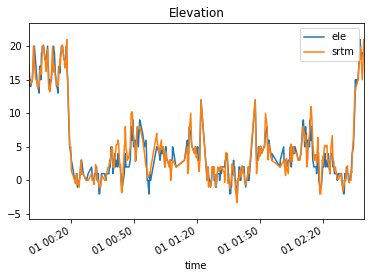

In [8]:
coords['srtm'] = [p.elevation for p in gpx_file.tracks[0].segments[0].points]
coords[['ele','srtm']].plot(title='Elevation');

## GPS Punkte plotten

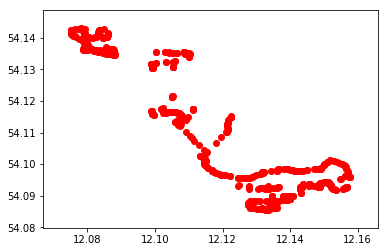

In [9]:
plt.plot(coords['lon'].values, coords['lat'].values, 'ro');

## Anzahl der GPS Punkte beim Plotten reduzieren

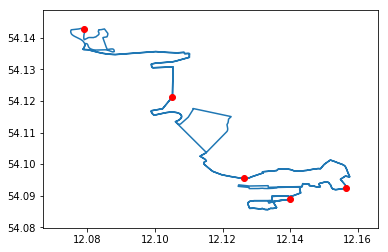

In [10]:
plt.plot(coords['lon'].values, coords['lat'].values)
plt.plot(coords['lon'].values[::150], coords['lat'].values[::150], 'ro');

## Anzahl der GPS Punkte durch Ramer-Douglas-Peucker Algorithmus reduzieren

- Mittels [Python/Numpy implementation of the Ramer-Douglas-Peucker algorithm ](https://github.com/fhirschmann/rdp)

710 points reduced to 277!


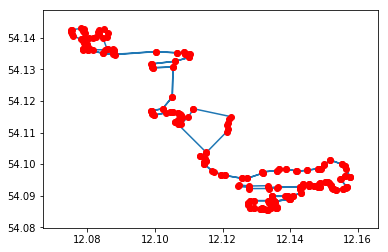

In [13]:
from rdp import rdp

simple_coords = rdp(coords[['lon', 'lat']].values, epsilon=1e-4)
print("{} points reduced to {}!".format(coords.shape[0], simple_coords.shape[0]))
plt.plot(simple_coords[:, 0], simple_coords[:, 1])
plt.plot(simple_coords[:, 0], simple_coords[:, 1], 'ro');


## Reduzierte GPS Punkte mittels Leaflet interaktiv auf einer OSM-Karte anzeigen

- [mplleaflet](https://github.com/jwass/mplleaflet)
- Lizenz: BSD-3-Clausel

In [14]:
import mplleaflet
fig = plt.figure()
simple_coords = rdp(coords[['lon', 'lat']].values, epsilon=1e-4)
print("{} points reduced to {}!".format(coords.shape[0], simple_coords.shape[0]))
plt.plot(simple_coords[:, 0], simple_coords[:, 1])
plt.plot(simple_coords[:, 0], simple_coords[:, 1], 'ro');

mplleaflet.display(fig=fig)

710 points reduced to 277!


- Quelle und weiterführende Informationen: https://github.com/FlorianWilhelm/gps_data_with_python
- Quelle RostockerMarathonNacht2015.gpx: http://www.gpsies.com/map.do?fileId=jqudgprghaafjvop